In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set_style()

In [2]:
cols = ['ult_actual', 'categoria', 'cupo_total_tc', 'ingreso_final', 'saldo_no_rot_mdo',
        'cant_oblig_tot_sf', 'ind', 'gasto_familiar', 'cuotas_pagar', 'ingreso_poc',
        'age_cat', 'genre', 'occupation', 'civil_status', 'academic_level', 'house_kind',
        'pending_arrears', 'have_tc']
    
df = pd.read_csv("dataF.csv", sep = ",")
df.head()

,Unnamed: 0,ult_actual,categoria,cupo_total_tc,ingreso_final,saldo_no_rot_mdo,cant_oblig_tot_sf,ind,gasto_familiar,cuotas_pagar,ingreso_poc,genre,pending_arrears,have_tc,age_cat_X,age_cat_Y,age_cat_Z,occupation_ama de casa,occupation_comerciante,occupation_desempleado con ingresos,occupation_desempleado sin ingresos,occupation_empleado,occupation_estudiante,occupation_ganadero,occupation_independiente,occupation_jubilado,occupation_pensionado,occupation_profesional independiente,occupation_rentista de capital,occupation_socio empleado - socio,civil_status_divorciado,civil_status_soltero,civil_status_union libre,civil_status_viudo,academic_level_especializacion,academic_level_ninguno,academic_level_primario,academic_level_tecnologo,academic_level_universitario,house_kind_familiar,house_kind_propia
0,7,20190429,1,6000000.0,2629942.30,21423000.0,10.0,1006462.495,84040.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,8,20180628,1,6000000.0,2660041.28,21949000.0,6.0,1417026.832,240906.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,9,20190429,1,6000000.0,2599610.30,22289000.0,9.0,1196746.695,376766.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,10,20200618,2,6000000.0,3312905.18,20636000.0,12.0,512597.867,273565.0,0.0,0.0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,11,20200618,2,6000000.0,3312905.18,20636000.0,12.0,512438.857,150000.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [3]:
df.shape

(830857, 41)

In [4]:
df = df.dropna(subset = ["categoria"])
df["categoria"] = df["categoria"].astype(np.int64).astype(object)

In [10]:
df = df.fillna(0)
del df["Unnamed: 0"]
del df["ult_actual"]

In [11]:
df.columns

Index(['categoria', 'cupo_total_tc', 'ingreso_final', 'saldo_no_rot_mdo',
       'cant_oblig_tot_sf', 'ind', 'gasto_familiar', 'cuotas_pagar',
       'ingreso_poc', 'genre', 'pending_arrears', 'have_tc', 'age_cat_X',
       'age_cat_Y', 'age_cat_Z', 'occupation_ama de casa',
       'occupation_comerciante', 'occupation_desempleado con ingresos',
       'occupation_desempleado sin ingresos', 'occupation_empleado',
       'occupation_estudiante', 'occupation_ganadero',
       'occupation_independiente', 'occupation_jubilado',
       'occupation_pensionado', 'occupation_profesional independiente',
       'occupation_rentista de capital', 'occupation_socio empleado - socio',
       'civil_status_divorciado', 'civil_status_soltero',
       'civil_status_union libre', 'civil_status_viudo',
       'academic_level_especializacion', 'academic_level_ninguno',
       'academic_level_primario', 'academic_level_tecnologo',
       'academic_level_universitario', 'house_kind_familiar',
       'house_

## Variables númericas

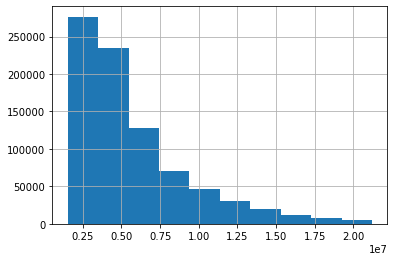

In [12]:
df["ingreso_final"].hist();

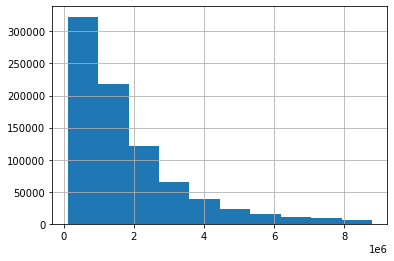

In [13]:
df["ind"].hist();

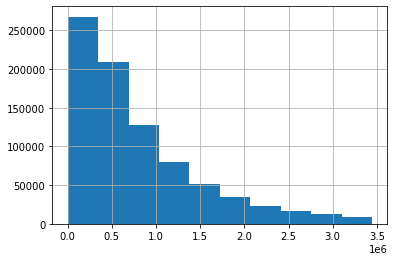

In [14]:
df["gasto_familiar"].hist();

### Eliminación de outliers

In [48]:
max_gf = df.gasto_familiar.quantile(0.95)
min_gf = df.gasto_familiar.quantile(0.05)
max_if = df.ingreso_final.quantile(0.95)
min_if = df.ingreso_final.quantile(0.05)
max_ind = df.ind.quantile(0.95)
min_ind = df.ind.quantile(0.05)

In [49]:
df = df[(df['ingreso_final'] > min_if) & (df['ingreso_final']< max_if)]
df = df[(df['ind'] > min_ind) & (df['ind']< max_ind)]
df = df[(df['gasto_familiar'] > min_gf) & (df['gasto_familiar']< max_gf)]

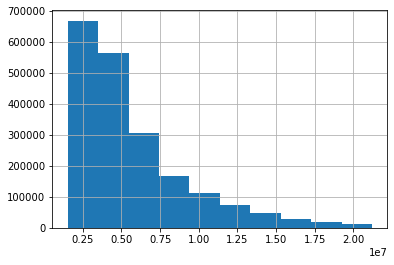

In [50]:
df["ingreso_final"].hist();

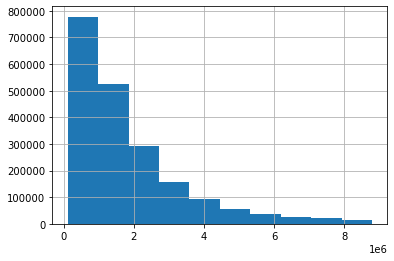

In [51]:
df["ind"].hist();

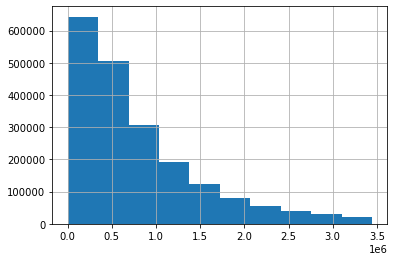

In [52]:
df["gasto_familiar"].hist();

### One Hot Encoding

In [53]:
categorical = df.select_dtypes(include=['object'])
names = categorical.columns
names

Index(['age_cat', 'occupation', 'civil_status', 'academic_level',
       'house_kind'],
      dtype='object')

In [54]:
df = pd.get_dummies(df, prefix=names)
df = df.drop(["age_cat_BB", "civil_status_casado", "academic_level_bachiller", 
              "occupation_agricultor", "house_kind_alquilada"], axis = 1)

In [55]:
df.shape

(1999652, 40)

In [57]:
del df["ult_actual"]
#df.to_csv("dataF.csv", sep = ",")

In [24]:
df.dtypes

categoria                                 int64
cupo_total_tc                           float64
ingreso_final                           float64
saldo_no_rot_mdo                        float64
cant_oblig_tot_sf                       float64
ind                                     float64
gasto_familiar                          float64
cuotas_pagar                            float64
ingreso_poc                             float64
genre                                     int64
pending_arrears                           int64
have_tc                                   int64
age_cat_X                                 int64
age_cat_Y                                 int64
age_cat_Z                                 int64
occupation_ama de casa                    int64
occupation_comerciante                    int64
occupation_desempleado con ingresos       int64
occupation_desempleado sin ingresos       int64
occupation_empleado                       int64
occupation_estudiante                   

In [25]:
corr = df.select_dtypes(include="float64")

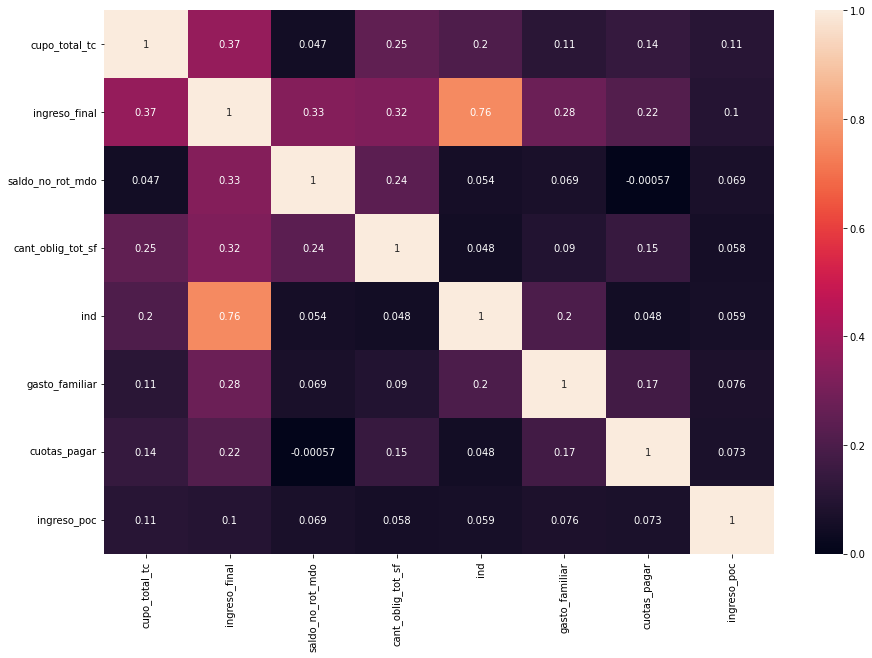

In [30]:
plt.figure(figsize = (15,10))
corrMatrix = corr.corr()
swarm_plot = sns.heatmap(corrMatrix, annot=True)
fig = swarm_plot.get_figure()
fig.savefig("correlograma.png")

### Modelos

In [15]:
X = df.drop(["gasto_familiar"], axis = 1)
Y = df["gasto_familiar"]

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import ElasticNetCV
from sklearn.neural_network import MLPRegressor

scoring = ["r2", "neg_mean_absolute_percentage_error"]

#### ElasticNet

In [17]:
ENReg = ElasticNetCV(random_state = 0)

scores = cross_validate(ENReg, X, Y,return_train_score = True, cv=5, scoring = scoring)
print(f"Entrenamiento r2 score: {np.mean(scores['train_r2'])}")
print(f"Test r2 score: {np.mean(scores['test_r2'])}")
print(f"Entrenamiento nMAPE score: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test nMAPE score: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

Entrenamiento r2 score: 0.09101057299640614
Test r2 score: 0.09077536862478137
Entrenamiento nMAPE score: -220.16472665913452
Test nMAPE score: -217.87883722117763


In [18]:
GBReg = GradientBoostingRegressor(n_estimators=50, 
                                  max_depth = 15,
                                  random_state = 101,
                                  subsample = 0.5,
                                  verbose = 2)

scores = cross_validate(GBReg, X, Y,return_train_score = True, cv=5, scoring = scoring)
print(f"Entrenamiento r2 score: {np.mean(scores['train_r2'])}")
print(f"Test r2 score: {np.mean(scores['test_r2'])}")
print(f"Entrenamiento nMAPE score: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test nMAPE score: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 478287475292.9548 14012804179.7533            2.56m
         2 463317165814.5343 11444584324.3040            2.50m
         3 452176152447.9870  9703408293.6000            2.45m
         4 438878692914.0586  7922722349.9900            2.40m
         5 429935965576.2411  6668389748.1906            2.35m
         6 420686200713.0966  5627046639.3767            2.30m
         7 412421565180.9791  4764724253.1730            2.25m
         8 405572108995.9174  4015257689.6797            2.19m
         9 400630512177.8563  3199498712.2465            2.14m
        10 395722574208.6388  2743662053.2779            2.09m
        11 388464710760.0272  2213302133.9666            2.04m
        12 383747198776.5511  2351908329.1379            1.99m
        13 378772551413.9266  1863619852.8784            1.94m
        14 374538586019.1973  1783665121.1278            1.89m
        15 372530057161.9822  1344920413.3699          

In [19]:
GBReg = GradientBoostingRegressor(n_estimators=50, 
                                  max_depth = 30,
                                  random_state = 101,
                                  subsample = 0.5,
                                  verbose = 2)

scores = cross_validate(GBReg, X, Y,return_train_score = True, cv=5, scoring = scoring)
print(f"Entrenamiento r2 score: {np.mean(scores['train_r2'])}")
print(f"Test r2 score: {np.mean(scores['test_r2'])}")
print(f"Entrenamiento nMAPE score: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test nMAPE score: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 425622947772.4495 24317321835.4986            4.07m
         2 383010822094.4579 20586607692.3362            4.00m
         3 350263555021.2340 16088927143.3942            3.92m
         4 317328200185.4700 12558983378.8102            3.83m
         5 291438018784.1011  9892118026.6293            3.75m
         6 267282227216.0476  7628214057.5794            3.67m
         7 247657990376.7360  5662181752.5552            3.60m
         8 231260750222.1509  4088363906.6649            3.52m
         9 215625884658.2798  2799353255.0235            3.44m
        10 201597085383.7921  1886256836.9419            3.36m
        11 189846686088.3466  1115889871.6492            3.29m
        12 179990424210.9078   524223189.8716            3.21m
        13 169976515652.4926    42755308.5072            3.14m
        14 161657667326.4137  -401051536.7065            3.06m
        15 155029889808.0010  -663796425.5184          

In [ ]:
MLPReg = MLPRegressor(random_state=1, max_iter=500, verbose = True)

scores = cross_validate(GBReg, X, Y,return_train_score = True, cv=5, scoring = scoring)
print(f"Entrenamiento r2 score: {np.mean(scores['train_r2'])}")
print(f"Test r2 score: {np.mean(scores['test_r2'])}")
print(f"Entrenamiento nMAPE score: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test nMAPE score: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 425622947772.4495 24317321835.4986            4.03m
         2 383010822094.4579 20586607692.3362            3.96m
         3 350263555021.2340 16088927143.3942            3.87m
         4 317328200185.4700 12558983378.8102            3.79m
         5 291438018784.1011  9892118026.6293            3.71m
         6 267282227216.0476  7628214057.5794            3.63m
         7 247657990376.7360  5662181752.5552            3.54m
         8 231260750222.1509  4088363906.6649            3.44m
         9 215625884658.2798  2799353255.0235            3.36m
        10 201597085383.7921  1886256836.9419            3.28m
        11 189846686088.3466  1115889871.6492            3.21m
        12 179990424210.9078   524223189.8716            3.13m
        13 169976515652.4926    42755308.5072            3.05m
        14 161657667326.4137  -401051536.7065            2.97m
        15 155029889808.0010  -663796425.5184          